<a href="https://colab.research.google.com/github/dwm-multimidia/dwm-multimidia.github.io/blob/master/lab4/jupyter/Lab4_ImageDWT_x.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ESTI019 - QS2021 - CSM - Lab4

# Lab4 - Codificação de Imagem com DWT 

A. Objetivos:


1.   Efetuar a Codificação de Imagem e a Decodificação por DWT e IDWT
2.   Testar funções de Codificação Multinível
3.   Verificar a taxa de compressão só com a Componente de Aproximação

In [3]:
import numpy as np
import cv2 as cv
import pywt
import pywt.data
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

B. Monte o seu google drive e verifique os seus arquivos:

In [1]:
from pathlib import Path
import shutil

dirGit = Path('/content/dwm-multimidia.github.io/')
if dirGit.exists():
  shutil.rmtree(dirGit)

!git clone https://github.com/dwm-multimidia/dwm-multimidia.github.io.git

dirLab4 = dirGit.joinpath('lab4/jupyter/')
print('\nAgora temos acesso aos arquivos:\n\t', '\n\t '.join([str(arquivo) for arquivo in dirLab4.iterdir()]))

Cloning into 'dwm-multimidia.github.io'...
remote: Enumerating objects: 349, done.
remote: Counting objects: 100% (349/349), done.
remote: Compressing objects: 100% (250/250), done.
remote: Total 349 (delta 164), reused 236 (delta 76), pack-reused 0
Receiving objects: 100% (349/349), 82.23 MiB | 31.52 MiB/s, done.
Resolving deltas: 100% (164/164), done.

Agora temos acesso aos arquivos:
	 /content/dwm-multimidia.github.io/lab4/jupyter/peppers.png
	 /content/dwm-multimidia.github.io/lab4/jupyter/Lab4_ImageDWT_x.ipynb


C. Codificação de Luminância (P&B) com DWT para a Pimentas

Text(0.5, 1.0, 'CD - Bordas Diagonais')

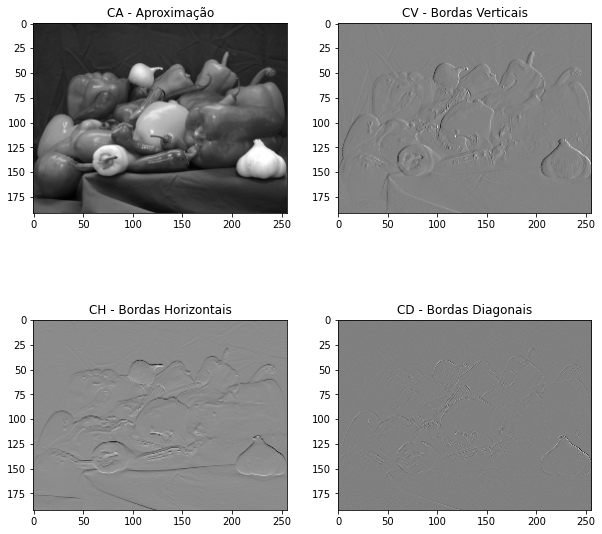

In [4]:
img = mpimg.imread(str(dirLab4 / 'peppers.png'))

img_gray = cv.cvtColor(img, cv.COLOR_RGB2GRAY)


coefs2 = pywt.dwt2(img_gray,'haar', mode='periodization')  #1 nível de DWT
(cA, (cH, cV, cD)) = coefs2 #Separando os coeficientes
imgr = pywt.idwt2(coefs2, 'haar', mode = 'periodization')  #1 nível de IDWT

plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
plt.imshow(cA,'gray'); plt.title("CA - Aproximação")
plt.subplot(2,2,2)
plt.imshow(cV,'gray'); plt.title("CV - Bordas Verticais")
plt.subplot(2,2,3)
plt.imshow(cH,'gray'); plt.title("CH - Bordas Horizontais")
plt.subplot(2,2,4)
plt.imshow(cD,'gray'); plt.title("CD - Bordas Diagonais")


C.1 Cálculo do Erro Quadrático Médio (MSE) e da Relação Sinal Ruído de Pico (PSNR)

a) A MSE é obtida calculando somando-se o erro quadrático de reconstrução pixel a pixel entre a Imagem Original (O) da Reconstruída (R) e normalizando pela dimensão (LxA) da imagem:

$ MSE = \frac{1}{LA}{\sum_{i=0}^L}{\sum_{j=0}^A [O(i,j) - R(i,j)]^2}$

b) A SNR de pico (PSNR) é definida para cada plano componente da imagem como:

$ PSNR = 10.log_{10} \left( \frac{{MAX_I}^2}{MSE} \right) $

sendo $MAX_I$ o valor máximo do pixel, que para 8 bits equivale a 255, logo:

$ PSNR = 20.log_{10}(255) - 10.log_{10} (MSE) $

OBS.: Para uma imagem RGB, $ MSE = MSE_R + MSE_G + MSE_B $, sendo similar definiação para YCrCb e HSV


In [ ]:
# Calculo da MSE P&B
A, L, Camadas = img.shape
dif = img_gray - imgr
MSE_gray = np.sum(np.matmul(dif,np.transpose(dif)))/(A*L)
print("MSE_Y = {:.2e}".format(MSE_gray))
PSNR_Y = 20*np.log10(255) - 10*np.log10(MSE_gray)
print("PSNR_Luma = {:.2f} dB".format(PSNR_Y))
plt.figure(figsize=(20,10))
infograf = "Imagem Reconstruída de Luminância (Y) com PSNR = " + str(np.uint8(PSNR_Y)) + ' dB'
plt.subplot(1,2,1); plt.imshow(img_gray,'gray'); plt.title("Imagem Original P&B")
plt.subplot(1,2,2); plt.imshow(imgr,'gray'); plt.title(infograf)

D. Teste das Funções de Multiresolução wavedec2() e waverec2()

In [ ]:
C = pywt.wavedec2(img_gray,'haar', mode = 'symmetric', level=2) # Dois níveis de decomposição DWT
imgr2 = pywt.waverec2(C, 'haar', mode = 'symmetric') # Dois níveis de IDWT

# Para extrair os coeficientes de cada nível
cA2 = C[0]  # Coeficientes de Aproximação nível 2
(cH1, cV1, cD1) = C[-1] # Coeficientes de Detalhes nível 1
(cH2, cV2, cD2) = C[-2] # Coeficientes de Detalhes nível 2

# Imagem Original
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

# Plot dos coeficientes do nível 2
plt.figure(figsize=(5,5))
plt.subplot(2,2,1)
plt.imshow(cA2, 'gray'); plt.title('Ap. N2: CA2')
plt.subplot(2,2,2)
plt.imshow(cV2, 'gray'); plt.title('B. V. N2: CV2')
plt.subplot(2,2,3)
plt.imshow(cH2, 'gray'); plt.title('B. H. N2: CH2')
plt.subplot(2,2,4)
plt.imshow(cD2, 'gray'); plt.title('B. D. N2: CD2')

# Plot Original e Reconstrução
plt.figure(figsize=(20,10))
plt.subplot(1,2,1); plt.imshow(img_gray,'gray'); plt.title('Imagem Original')
plt.subplot(1,2,2); plt.imshow(imgr2,'gray'); plt.title('Imagem Reconstruída')


E. Efetuar uma "Montagem" com wavedec2() e wavedecn() 

1º Nível

In [ ]:
CV1 = cV1.copy()
CH1 = cH1.copy()
CD1 = cD1.copy()


2º Nível

In [ ]:
CA2 = cA2.copy()
CH2 = cH2.copy()
CV2 = cV2.copy()
CD2 = cD2.copy()
# Matriz Final Completa
CA1 = np.bmat([[CA2,CV2],[CH2,CD2]])
CC = np.bmat([[CA1,CV1],[CH1,CD1]])


In [ ]:
plt.figure(figsize=(20,20))
plt.imshow(CC,'gray')
plt.title('Codificação de Imagem em multinível com função wavedec2()')

F. Reconstrução de Imagem Colorida

In [ ]:
# Imagem Original

plt.figure(figsize=(20,20))
plt.imshow(img); plt.title("Imagem Original")

# Codificação por planos de cores
# Plano Vermelho
coefs_R = pywt.dwt2(img[:,:,0],'haar', mode='periodization')  #1 nível de DWT R
(cA_R, (cH_R, cV_R, cD_R)) = coefs_R #Separando os coeficientes
cr_R = pywt.idwt2(coefs_R, 'haar', mode = 'periodization')  #1 nível de IDWT R

plt.figure(figsize=(20,20))
plt.subplot(2,2,1)
plt.imshow(cA_R,'Reds_r'); plt.title("CA_Red - Aproximação")
plt.subplot(2,2,2)
plt.imshow(cV_R,'Reds_r'); plt.title("CV_Red - Bordas Verticais")
plt.subplot(2,2,3)
plt.imshow(cH_R,'Reds_r'); plt.title("CH_Red - Bordas Horizontais")
plt.subplot(2,2,4)
plt.imshow(cD_R,'Reds_r'); plt.title("CD_Red - Bordas Diagonais")

plt.figure(figsize=(20,20))
plt.imshow(cr_R, 'Reds_r'); plt.title("Imagem Reconstruída Red")


In [ ]:
# Plano Verde
coefs_G = pywt.dwt2(img[:,:,1],'haar', mode='periodization')  #1 nível de DWT G
(cA_G, (cH_G, cV_G, cD_G)) = coefs_G #Separando os coeficientes
cr_G = pywt.idwt2(coefs_G, 'haar', mode = 'periodization')  #1 nível de IDWT G

plt.figure(figsize=(20,20))
plt.subplot(2,2,1)
plt.imshow(cA_G,'Greens_r'); plt.title("CA_Green - Aproximação")
plt.subplot(2,2,2)
plt.imshow(cV_G,'Greens_r'); plt.title("CV_Green - Bordas Verticais")
plt.subplot(2,2,3)
plt.imshow(cH_G,'Greens_r'); plt.title("CH_Green - Bordas Horizontais")
plt.subplot(2,2,4)
plt.imshow(cD_G,'Greens_r'); plt.title("CD_Green - Bordas Diagonais")

plt.figure(figsize=(20,20))
plt.imshow(cr_G, 'Greens_r'); plt.title("Imagem Reconstruída Green")

In [ ]:
# Plano Azul
coefs_B = pywt.dwt2(img[:,:,2],'haar', mode='periodization')  #1 nível de DWT B
(cA_B, (cH_B, cV_B, cD_B)) = coefs_B #Separando os coeficientes
cr_B = pywt.idwt2(coefs_B, 'haar', mode = 'periodization')  #1 nível de IDWT B

plt.figure(figsize=(20,20))
plt.subplot(2,2,1)
plt.imshow(cA_B,'Blues_r'); plt.title("CA_Blue - Aproximação")
plt.subplot(2,2,2)
plt.imshow(cV_B,'Blues_r'); plt.title("CV_Blue - Bordas Verticais")
plt.subplot(2,2,3)
plt.imshow(cH_B,'Blues_r'); plt.title("CH_Blue - Bordas Horizontais")
plt.subplot(2,2,4)
plt.imshow(cD_B,'Blues_r'); plt.title("CD_Blue - Bordas Diagonais")

plt.figure(figsize=(20,20))
plt.imshow(cr_B, 'Blues_r'); plt.title("Imagem Reconstruída Blue")

In [ ]:
# Reconstrução Nível 1 Colorida 
A1, L1 = cA_R.shape
imgrec1 = np.zeros((A1,L1,3))
imgrec1[:,:,0] = cA_R.copy()
imgrec1[:,:,1] = cA_G.copy()
imgrec1[:,:,2] = cA_B.copy()
plt.figure(figsize=(10,10))
plt.imshow(imgrec1); plt.title("Imagem Reconstruída DWT/IDWT Nível 1")


G. Salvando as Aproximações e depois fazendo download dos arquivos, calcular a taxa de compressão com o original

In [ ]:
# obtenha aproximação de NÍVEL 1 e converte para inteiro
C1 = pywt.wavedec2(img_gray,'haar', mode = 'symmetric', level=1) # Um nível de decomposição DWT
CA1_ = 255 * C1[0] / np.abs(C1[0]).max()
CA1_ = CA1_.astype(int)

# aproximação de NÍVEL 2 - ja´obtido no item (D) e converte para inteiro
CA2_ = 255 * cA2 / np.abs(cA2).max()
CA2_ = CA2_.astype(int)

# Salva no drive
cv.imwrite('drive/My Drive/Colab Notebooks/peppers_DWT_N1_Y.bmp', CA1_) # Aproximação Nível 1 só Y
cv.imwrite('drive/My Drive/Colab Notebooks/peppers_DWT_N2_Y.bmp', CA2_) # Aproximação Nível 2 só Y


H. Gravando o Arquivo Codificado DWT/IDWT nível 1 Colorido, calcular a taxa de compressão com o original

In [ ]:
# Aproximação Nível 1 Colorida 
# converte RGB para BGR e converte para inteiro
imgrec1_ = np.zeros((A1,L1,3))
imgrec1_[:,:,0] = imgrec1[:,:,2] 
imgrec1_[:,:,1] = imgrec1[:,:,1] 
imgrec1_[:,:,2] = imgrec1[:,:,0] 
imgrec1_ = ( 255 * imgrec1_ / np.abs(imgrec1_).max() ).astype(int)

# Salva no drive
cv.imwrite('drive/My Drive/Colab Notebooks/peppers_DWT_N1_colorida.bmp', imgrec1_) # Gravando Aproximação Nível 1 Colorida

I. Reconstrução da Imagem colorida e Cálculo da MSE de cada plano de cor e da PSNR total

In [ ]:
# Reconstrução Colorida Original
A,L = imgr2.shape
imgrec = np.zeros((A,L,3))
imgrec[:,:,0] = cr_R.copy()
imgrec[:,:,1] = cr_G.copy()
imgrec[:,:,2] = cr_B.copy()

# Calculo do MSE colorida
dif2 = img - imgrec
MSE_R = np.sum(np.matmul(dif2[:,:,0],np.transpose(dif2[:,:,0])))/(A*L) # Erro Quadrático Médio plano R
MSE_G = np.sum(np.matmul(dif2[:,:,1],np.transpose(dif2[:,:,1])))/(A*L) # Erro Quadrático Médio plano G
MSE_B = np.sum(np.matmul(dif2[:,:,2],np.transpose(dif2[:,:,2])))/(A*L) # Erro Quadrático Médio plano B
print("MSE_Red= {:.2e}".format(MSE_R), " MSE_Green= {:.2e}".format(MSE_G), " MSE_Blue= {:.2e}".format(MSE_B))

# Cálculo da SNR de pico colorida (PSNR), 3 camadas R, G e B
PSNR = 20*np.log10(255) - 10*np.log10(MSE_R + MSE_G + MSE_B)
print("PSNR total = {:.2f} dB".format(PSNR))

plt.figure(figsize=(20,20))
infograf2 = "Imagem Reconstruída com PSNR total = " + str(np.uint8(PSNR)) + ' dB'
plt.imshow(imgrec); plt.title(infograf2)

# I. Cada um deve repetir todos os passos para a sua foto individual

# J. Relatório (página)


1.   Acrescentar também a foto-montagem do grupo todo, mas codificar esta foto-montagem em um nível com DWT também as componentes Cr e Cb (efetuamos aqui apenas para a componente Y)
2.   Fazer uma tabela com as taxas de compressão obtidas e a PSNR de cada uma das fotos utilizadas



-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X